### ndarray 객체 구조
- ndarray는 연속적이든 아니든, 단일 형태의 데이터 블록을 다차원 배열 객체 형태로 해석할 수 있는 수단을 제공
- ndarray는 단순한 메모리 덩어리와 dtype 만을 ㄱ자ㅣ는 것이 아닌, 다양한 너비로 메모리 사이를 건너뛸 수 있는 보폭 정보를 포함


#### ndarray의 내부적 구성
1. 데이터 포인터 : RAM이나 메모리 맵 파일에서 데이터의 블록
2. dtype : 배열 내에서 값을 담는 고정된 크기
3. shape : 모양을 ㅇ라려주는 튜플
4. stride : 하나의 차원을 따라 다음 원소로 몇 바이트 이동해야 하는지를 나타내는 튜플

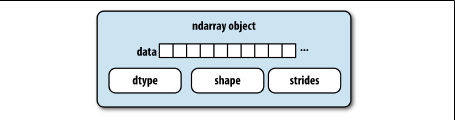

In [2]:
import numpy as np

In [3]:
np.ones((10, 5)).shape

(10, 5)

In [4]:
np.ones((3, 4, 5), dtype = np.float64).strides

(160, 40, 8)

### 
### NumPy dtype 구조
### ```np.issubdtype(data, dtype)``` : 데이터 dtype 여부
- ```dtype``` : np.integer, np.float32 등 

In [5]:
ints = np.ones(10, dtype = np.uint16)
floats = np.ones(10, dtype = np.float32)
np.issubdtype(ints.dtype, np.integer)

True

In [6]:
np.issubdtype(floats.dtype, np.floating)

True

### ```np.dtype.mro()``` : 특정 dtype의 모든 부모 클래스 확인

In [7]:
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

In [8]:
np.issubdtype(ints.dtype, np.number)

True

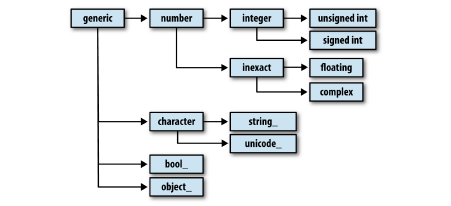

## 
### 고급 배열 조작
### 배열 재형성

In [19]:
arr = np.arange(8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [20]:
arr.reshape((4, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

#### 다차원 배열 재형성

In [21]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

#### reshape에 넘기는 값 중 하나가 -1 : 원본 데이터를 참조해서 적절한 값을 추론

In [12]:
arr = np.arange(15)
arr.reshape((5, -1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

#### 배열의 shape 속성은 튜플 => reshape 메서드에 이를 직접 넘기는 것도 가능

In [13]:
other_arr = np.ones((3, 5))
other_arr.shape

(3, 5)

In [14]:
arr.reshape(other_arr.shape)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

#### 평탄화 : 다차원 배열을 낮은 차원으로 변환

In [24]:
arr = np.arange(15).reshape((5, 3))
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

### ```.ravel()``` : 평탄화, 필요하지 않다면 원본 데이터의 복사본 생성 X
### ```.flatten()``` : 평탄화, 항상 데이터의 복사본을 반환

In [25]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [26]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### 
### C 순서와 포트란 순서

#### 행 우선, 열 우선 재형성
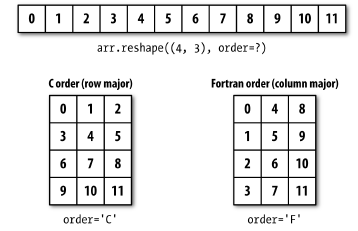

In [27]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
arr.ravel(order = 'C')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [31]:
arr.ravel(order = 'F')

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

### 
### 배열 이어붙이고 나누기

#### 배열 이어붙이기 함수
|  |  |
| -- | -- |
| concatenate | 가장 대표적인 함수, 하나의 축을 따라 배열을 이어붙임 |
| vstack, row_stack | 행 (axis = 0)을 따라 배열을 쌓음 |
| hstack | 열 (axis = 1)을 따라 배열을 쌓음 |
| column_stack | hstack과 동일하지만, 1차원 배열을 2차원 열 벡터로 먼저 변환 |
| dstack | 깊이 (axis = 2)에 따라 배열을 쌓음 |
| split | 특정 축을 따라 지정된 위치를 기점으로 배열을 나눔 |
| hsplit, vsplit | 각각 axis = 0과 axis = 1을 따라 배열을 나눔 |


#### ```np.concatenate()``` : 배열의 목록 (튜플, 리스트 등)을 받아, 주어진 축에 따라 하나의 배열로 합침

In [35]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
np.concatenate([arr1, arr2], axis = 0) # 행 방향 결합 rbind

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [34]:
np.concatenate([arr1, arr2], axis = 1) # 열 방향 결합 cbind

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

#### ```np.vstack()``` : 행 방향 결합 (rbind)
#### ```np.hstack()``` : 열  방향 결합 (cbind)

In [37]:
np.vstack((arr1, arr2)), np.hstack((arr1, arr2))

(array([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]),
 array([[ 1,  2,  3,  7,  8,  9],
        [ 4,  5,  6, 10, 11, 12]]))

#### ```np.split()``` : 하나의 배열을 축을 따라 여러 개의 배열로 분할

In [38]:
arr = np.random.randn(5, 2)
arr

array([[ 1.27576833,  0.82310199],
       [-1.17399494, -1.32162856],
       [-1.48407555, -0.95683599],
       [ 2.04714021,  0.4416413 ],
       [-0.62669016,  0.04279066]])

In [39]:
first, second, third = np.split(arr, [1, 3]) # 열 방향으로, 3개로 분할
first, second, third

(array([[1.27576833, 0.82310199]]),
 array([[-1.17399494, -1.32162856],
        [-1.48407555, -0.95683599]]),
 array([[ 2.04714021,  0.4416413 ],
        [-0.62669016,  0.04279066]]))

### 
### 배열 쌓기 도우미 : r_ 과 c_

### ```np.r_()``` : 행 결합
### ```np.c_()``` : 열 결합

In [40]:
arr = np.arange(6)
arr1 = arr.reshape((3, 2))
arr2 = np.random.randn(3, 2)

In [41]:
np.r_[arr1, arr2]

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [-1.37613632, -0.49682212],
       [-0.03690585, -0.42208911],
       [-2.01718153, -1.48486448]])

In [42]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.        ,  1.        ,  0.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 4.        ,  5.        ,  2.        ],
       [-1.37613632, -0.49682212,  3.        ],
       [-0.03690585, -0.42208911,  4.        ],
       [-2.01718153, -1.48486448,  5.        ]])

#### 슬라이스를 배열로 변환

In [43]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

### 
### 원소 반복 : repeat, tile
### ```.repeat()``` : 한 배열의 각 원소를 원하는 만큼 복제하여, 큰 배열을 생성

In [62]:
arr = np.arange(3)
arr, arr.repeat(3)

(array([0, 1, 2]), array([0, 0, 0, 1, 1, 1, 2, 2, 2]))

- **만약 정수의 배열을 넘긴다면, 각 원소는 배열에 담긴 정수만큼 다르게 반복**

In [ ]:
arr.repeat([2, 3, 4])

- **다차원 배열의 경우, 특정 축을 따라 각 원소가 반복**

In [63]:
arr = np.random.randn(2, 2)
arr, 

(array([[0.26610217, 0.19705273],
        [1.16984948, 1.65272786]]),)

In [64]:
arr.repeat(2, axis = 0),

(array([[0.26610217, 0.19705273],
        [0.26610217, 0.19705273],
        [1.16984948, 1.65272786],
        [1.16984948, 1.65272786]]),)

- 다차원 배열에서 만약 axis 인자를 넘기지 않으면, 배열이 평탄화

In [65]:
arr.repeat([2, 3], axis = 0),

(array([[0.26610217, 0.19705273],
        [0.26610217, 0.19705273],
        [1.16984948, 1.65272786],
        [1.16984948, 1.65272786],
        [1.16984948, 1.65272786]]),)

In [67]:
arr.repeat([2, 3], axis = 1)

array([[0.26610217, 0.26610217, 0.19705273, 0.19705273, 0.19705273],
       [1.16984948, 1.16984948, 1.65272786, 1.65272786, 1.65272786]])

### ```.tile(arr, n)``` : 축을 따라 배열을 복사해서 쌓는 함수

In [55]:
arr, np.tile(arr, 2)

(array([[ 0.07773671, -1.472909  ],
        [ 0.22471395,  1.19549255]]),
 array([[ 0.07773671, -1.472909  ,  0.07773671, -1.472909  ],
        [ 0.22471395,  1.19549255,  0.22471395,  1.19549255]]))

In [56]:
arr, np.tile(arr, (2, 1))

(array([[ 0.07773671, -1.472909  ],
        [ 0.22471395,  1.19549255]]),
 array([[ 0.07773671, -1.472909  ],
        [ 0.22471395,  1.19549255],
        [ 0.07773671, -1.472909  ],
        [ 0.22471395,  1.19549255]]))

### 
### 팬시 인덱스 : take, put

In [76]:
arr = np.arange(10) * 100
arr

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [78]:
inds = [7, 1, 2, 6]
arr[inds]

array([700, 100, 200, 600])

In [79]:
arr.take(inds)

array([700, 100, 200, 600])

- ind에 해당하는 값에 42를 넣음

In [80]:
arr.put(inds, 42) # ind에 해당하는 값에 42를 넣음
arr

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

In [81]:
arr.put(inds, [40, 41, 42, 43])
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

- 다른 축에 take 메서드를 적용하려면, axis 인자를 넘김

In [82]:
inds = [2, 0, 2, 1]
arr = np.random.randn(2, 4)
arr

array([[ 0.99975612,  0.51310931, -0.69762432,  1.36059933],
       [ 1.86498082,  0.36192896,  0.07999256, -1.1685052 ]])

In [83]:
arr.take(inds, axis = 1)

array([[-0.69762432,  0.99975612, -0.69762432,  0.51310931],
       [ 0.07999256,  1.86498082,  0.07999256,  0.36192896]])

### 
### 브로드캐스팅 : 다른 모양의 배열 간의 산술 연산

In [85]:
arr = np.arange(5)
arr, arr * 4

(array([0, 1, 2, 3, 4]), array([ 0,  4,  8, 12, 16]))

In [91]:
arr = np.random.randn(4, 3)
arr, arr.mean(0)

(array([[-1.76043112, -0.4560284 , -1.43489474],
        [-1.57867671, -1.91019298, -0.12609428],
        [ 1.16965582, -0.679112  ,  0.8187652 ],
        [-0.07944751, -1.317473  , -1.17755278]]),
 array([-1.21711809, -1.20498799,  0.43643634, -0.85815776]))

In [93]:
demeaned = arr - arr.mean(0)
demeaned
demeaned.mean(0)

array([ 8.32667268e-17,  5.55111512e-17, -2.77555756e-17])

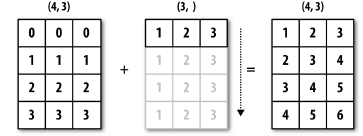

#### 브로드캐스팅 규칙 
- 만일 이어지는 각 차원 (시작부터 끝까지)에 대해 축의 길이가 일치하거나 둘 중 하나의 길이가 1이라면, 두 배열은 브로드캐스팅 호환이다. 브로드캐스팅은 누락된 혹은 길이가 1인 차원에 대해 수행

#### 2차원 배열의 1번 축에 대한 브로드캐스팅**

In [97]:
row_means = arr.mean(1)
row_means.shape, arr, row_means

((4,),
 array([[-1.76043112, -0.4560284 , -1.43489474],
        [-1.57867671, -1.91019298, -0.12609428],
        [ 1.16965582, -0.679112  ,  0.8187652 ],
        [-0.07944751, -1.317473  , -1.17755278]]),
 array([-1.21711809, -1.20498799,  0.43643634, -0.85815776]))

In [95]:
row_means.reshape((4, 1))

array([[-1.21711809],
       [-1.20498799],
       [ 0.43643634],
       [-0.85815776]])

In [96]:
demeaned = arr - row_means.reshape((4, 1))
demeaned, demeaned.mean(1)

(array([[-0.54331303,  0.76108969, -0.21777666],
        [-0.37368872, -0.70520499,  1.07889371],
        [ 0.73321948, -1.11554834,  0.38232886],
        [ 0.77871025, -0.45931523, -0.31939501]]),
 array([ 7.40148683e-17, -7.40148683e-17,  3.70074342e-17, -3.70074342e-17]))

**2차원 배열의 1번 축에 대한 브로드캐스팅**
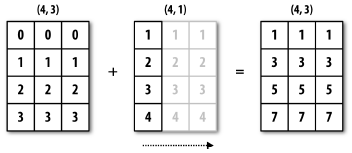

**3차원 배열의 0번 축에 대한 브로드캐스팅**
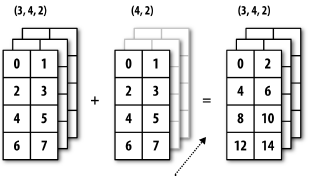

### 
### 다른 축에 대해 브로드캐스팅

In [98]:
arr - arr.mean(1).reshape((4, 1))

array([[-0.54331303,  0.76108969, -0.21777666],
       [-0.37368872, -0.70520499,  1.07889371],
       [ 0.73321948, -1.11554834,  0.38232886],
       [ 0.77871025, -0.45931523, -0.31939501]])

### ```np.newaxis``` : 새로운 축을 추가

In [99]:
arr = np.zeros((4, 4))
arr_3d = arr[:, np.newaxis, :]
arr_3d.shape

(4, 1, 4)

In [102]:
arr_1d = np.random.normal(size = 3)
arr_1d[:, np.newaxis], arr_1d.shape

(array([[-0.41733315],
        [-0.56037845],
        [-0.58526803]]),
 (3,))

In [103]:
arr_1d[np.newaxis, :], arr_1d.shape

(array([[-0.41733315, -0.56037845, -0.58526803]]), (3,))

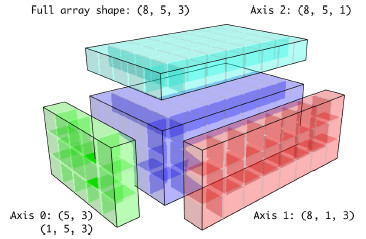

- 3차원 배열에서 2번 축에 대해 평균값을 뺄 떄

In [104]:
arr = np.random.randn(3, 4, 5)
depth_means = arr.mean(2)

In [108]:
depth_means, depth_means.shape

(array([[-0.39049459,  0.44583049, -0.48511839, -0.24957746],
        [-0.02079988,  0.43044266, -0.04867034, -0.62908596],
        [-1.61069136,  0.24758935, -0.4268531 ,  0.53614448]]),
 (3, 4))

In [111]:
demeaned = arr - depth_means[:, :, np.newaxis]
arr.shape, depth_means[:, :, np.newaxis].shape, demeaned.shape, demeaned.mean(2)

((3, 4, 5),
 (3, 4, 1),
 (3, 4, 5),
 array([[ 0.00000000e+00, -4.44089210e-17,  8.88178420e-17,
         -3.33066907e-17],
        [ 0.00000000e+00, -4.44089210e-17, -4.44089210e-17,
          8.88178420e-17],
        [ 4.44089210e-17, -8.88178420e-17,  4.44089210e-17,
         -4.44089210e-17]]))

### 
### 브로드캐스팅을 이용해서 배열에 값 대입

In [112]:
arr = np.zeros((4, 3))
arr[:] = 5
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [116]:
col = np.array([1.28, -0.42, 0.44, 1.6])
arr[:] = col[:, np.newaxis]
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

In [114]:
arr[:2] = [[-1.37], [0.509]]
arr

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])